## Анализ данных крупного агрегатора такси (поиск инсайтов, проверка гипотезы, составление рекомендаций стейкхолдерам)

In [3]:
import pandas as pd

### Загрузите файл dip_hw_x_taxi.csv в pandas dataframe

In [4]:
taxi_info = pd.read_csv('D:/Нетология/Аналитика данных для начинающих/Итоговая аттестация/Дипломная работа/dip_hw_x_taxi.csv')

### Рассчитайте основные описательные статистики (среднее, минимум, 25-50-75-персентили, максимум)

In [215]:
taxi_info.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,462807.384000,4.044000,11.608500,26.275848,0.587000
std,270556.211847,2.007256,6.918465,18.876336,0.492496
min,412.000000,1.000000,0.000000,0.024000,0.000000
25%,227126.500000,2.000000,6.000000,12.177000,0.000000
50%,458637.000000,4.000000,12.000000,22.828500,1.000000
75%,709420.250000,6.000000,18.000000,36.434250,1.000000
max,919196.000000,7.000000,23.000000,138.950000,1.000000


In [216]:
taxi_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_gk           2000 non-null   int64  
 1   weekday_key        2000 non-null   int64  
 2   hour_key           2000 non-null   int64  
 3   distance_km        2000 non-null   float64
 4   offer_class_group  2000 non-null   object 
 5   driver_response    2000 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 93.9+ KB


In [217]:
taxi_info

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,23,53.114,Premium,1
1,436,3,10,5.781,Delivery,1
2,1327,6,19,16.200,Delivery,0
3,2013,2,2,13.732,Delivery,0
4,2241,6,3,20.436,Premium,1
...,...,...,...,...,...,...
1995,918581,5,16,8.591,Delivery,1
1996,918656,7,14,30.835,Comfort,1
1997,918683,4,19,20.365,Delivery,0
1998,918737,2,23,14.960,Economy,0


In [218]:
taxi_info.columns

Index(['order_gk', 'weekday_key', 'hour_key', 'distance_km',
       'offer_class_group', 'driver_response'],
      dtype='object')

### Вычислите количество значений по классам такси

In [219]:
taxi_info.groupby('offer_class_group').count().reset_index()

,offer_class_group,order_gk,weekday_key,hour_key,distance_km,driver_response
0,Comfort,500,500,500,500,500
1,Delivery,500,500,500,500,500
2,Economy,500,500,500,500,500
3,Premium,500,500,500,500,500


### Визуализируйте распределение дистанций поездок

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# taxi_info_agg = агрегация значений max, min, mean
taxi_info_agg = taxi_info[['offer_class_group','distance_km']].groupby('offer_class_group').agg({'distance_km':['min','mean','max']}).reset_index()
taxi_info_agg

offer_class_group distance_km                    
                            min       mean      max
0           Comfort       0.024  29.758916   81.507
1          Delivery       0.064  17.894820   55.235
2           Economy       0.090  26.283098   90.517
3           Premium       0.052  31.166556  138.950

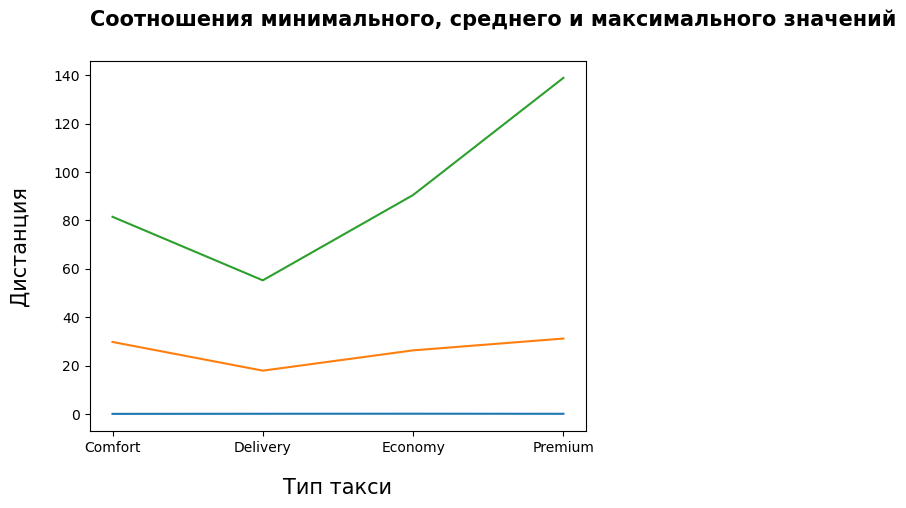

In [36]:
plt.title(label='Соотношения минимального, среднего и максимального значений', fontsize=15, loc='left',pad=25,fontweight='bold')
plt.ylabel('Дистанция',fontsize=15,labelpad=17)
plt.xlabel('Тип такси',fontsize=15,labelpad=17)
plt.plot(taxi_info_agg.offer_class_group,taxi_info_agg.distance_km)

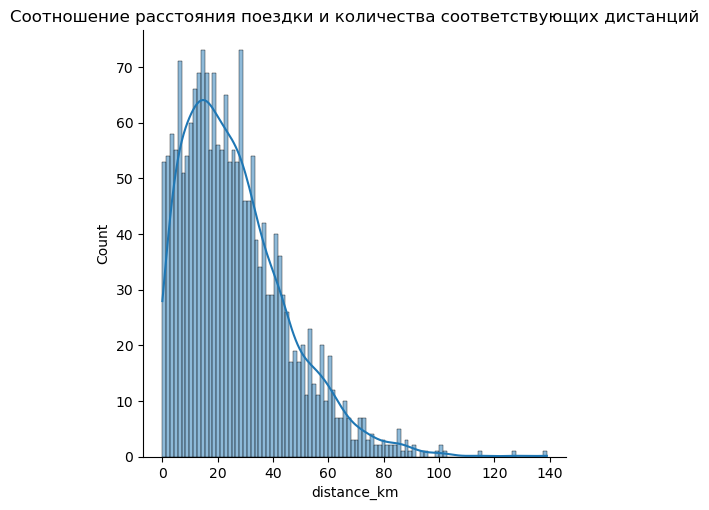

In [48]:
sns.displot(x=taxi_info.distance_km,bins=100,kde=True).set(title='Соотношение расстояния поездки и количества соответствующих дистанций')

### Визуализируйте распределения дистанций поездок, по каждому классу такси в отдельности, а также определите типы распределений для эконом-класса и комфорт-класса

In [50]:
def identification(data):
    if data == 'Comfort':
        return 1
    elif data == 'Economy':
        return 2
    elif data == 'Delivery':
        return 3
    else:
        return 4

In [51]:
taxi_info['identification'] = taxi_info['offer_class_group'].apply(identification)

In [52]:
taxi_info_comfort = taxi_info.where(taxi_info.offer_class_group == 'Comfort')  # разделяем датафреймы
taxi_info_economy = taxi_info.where(taxi_info.offer_class_group == 'Economy')
taxi_info_premium = taxi_info.where(taxi_info.offer_class_group == 'Premium')
taxi_info_delivery = taxi_info.where(taxi_info.offer_class_group == 'Delivery')

In [53]:
taxi_info_comfort = taxi_info_comfort.dropna()              # чистим от NAN, восстанавливаем индекс
taxi_info_economy = taxi_info_economy.dropna()
taxi_info_premium = taxi_info_premium.dropna()
taxi_info_delivery = taxi_info_delivery.dropna()
taxi_info_comfort.reset_index(drop=True, inplace=True)
taxi_info_economy.reset_index(drop=True, inplace=True)
taxi_info_delivery.reset_index(drop=True, inplace=True)
taxi_info_premium.reset_index(drop=True, inplace=True)

In [231]:
taxi_info_comfort

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response,identification
153,289990.0,5.0,0.0,0.024,Comfort,0.0,1.0
133,242330.0,5.0,0.0,0.144,Comfort,0.0,1.0
428,798867.0,5.0,14.0,0.292,Comfort,1.0,1.0
303,577776.0,3.0,21.0,0.422,Comfort,1.0,1.0
46,68734.0,5.0,16.0,0.609,Comfort,1.0,1.0
...,...,...,...,...,...,...,...
261,493219.0,4.0,20.0,74.825,Comfort,1.0,1.0
37,53288.0,4.0,14.0,79.368,Comfort,0.0,1.0
167,322385.0,3.0,12.0,80.596,Comfort,0.0,1.0
315,597610.0,6.0,16.0,81.478,Comfort,1.0,1.0


[Text(0.5, 1.0, 'Распределение дистанций поездок по классу Комфорт')]

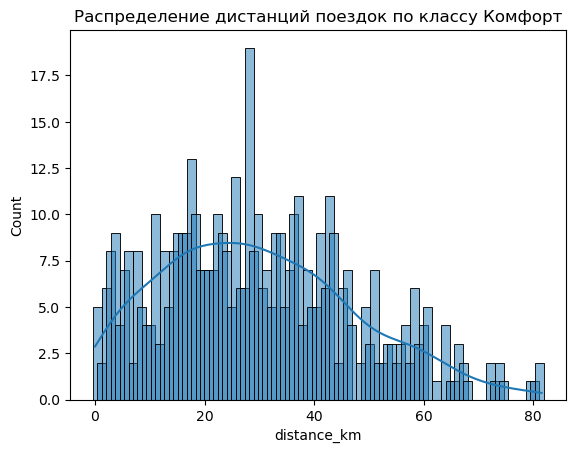

In [57]:
sns.histplot(x=taxi_info_comfort.distance_km,bins=100,kde=True,shrink=2).set(title='Распределение дистанций поездок по классу Комфорт')

#### Распределение "нормальное" или "с изолированным пиком"

In [119]:
taxi_info_economy

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response,identification
236,428085.0,1.0,20.0,0.090,Economy,0.0,2.0
134,243890.0,2.0,8.0,0.098,Economy,1.0,2.0
248,453618.0,2.0,11.0,0.109,Economy,1.0,2.0
15,35289.0,3.0,16.0,0.174,Economy,1.0,2.0
106,185609.0,5.0,20.0,0.234,Economy,0.0,2.0
...,...,...,...,...,...,...,...
145,266312.0,6.0,14.0,73.527,Economy,0.0,2.0
223,407927.0,6.0,0.0,75.213,Economy,0.0,2.0
201,369139.0,6.0,13.0,77.648,Economy,0.0,2.0
0,3845.0,3.0,7.0,83.830,Economy,0.0,2.0


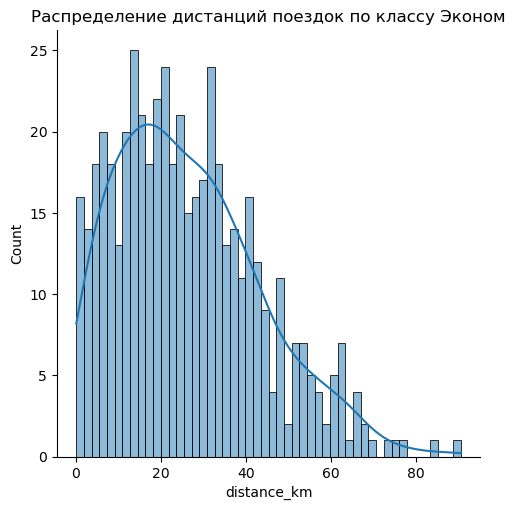

In [58]:
sns.displot(x=taxi_info_economy.distance_km,bins=50,kde=True).set(title='Распределение дистанций поездок по классу Эконом')

#### "Положительное или отрицательное скошенное распределение"

In [121]:
taxi_info_delivery

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response,identification
355,653184.0,1.0,21.0,0.064,Delivery,1.0,3.0
229,406724.0,1.0,12.0,0.259,Delivery,0.0,3.0
400,728054.0,1.0,11.0,0.296,Delivery,1.0,3.0
186,346380.0,6.0,18.0,0.317,Delivery,1.0,3.0
107,181838.0,4.0,5.0,0.357,Delivery,0.0,3.0
...,...,...,...,...,...,...,...
457,836795.0,6.0,1.0,45.581,Delivery,1.0,3.0
477,862657.0,5.0,0.0,47.784,Delivery,1.0,3.0
211,376916.0,6.0,19.0,48.227,Delivery,0.0,3.0
430,780434.0,7.0,3.0,53.811,Delivery,1.0,3.0


[Text(0.5, 1.0, 'Распределение дистанций поездок по классу Delivery')]

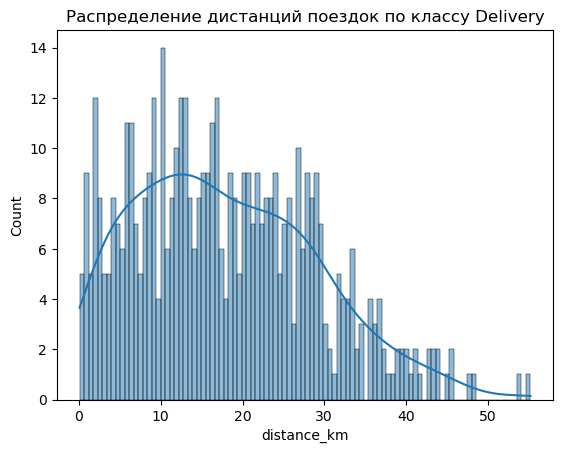

In [59]:
sns.histplot(x=taxi_info_delivery.distance_km,bins=100,kde=True).set(title='Распределение дистанций поездок по классу Delivery')

In [125]:
taxi_info_premium

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response,identification
102,191612.0,4.0,21.0,0.052,Premium,1.0,4.0
62,121356.0,5.0,16.0,0.175,Premium,0.0,4.0
260,496918.0,4.0,23.0,0.249,Premium,1.0,4.0
296,570862.0,1.0,2.0,0.315,Premium,1.0,4.0
393,752534.0,6.0,3.0,0.361,Premium,1.0,4.0
...,...,...,...,...,...,...,...
443,829490.0,3.0,9.0,101.122,Premium,1.0,4.0
141,262127.0,7.0,14.0,102.526,Premium,1.0,4.0
95,171687.0,4.0,11.0,114.389,Premium,0.0,4.0
134,253604.0,2.0,14.0,127.045,Premium,1.0,4.0


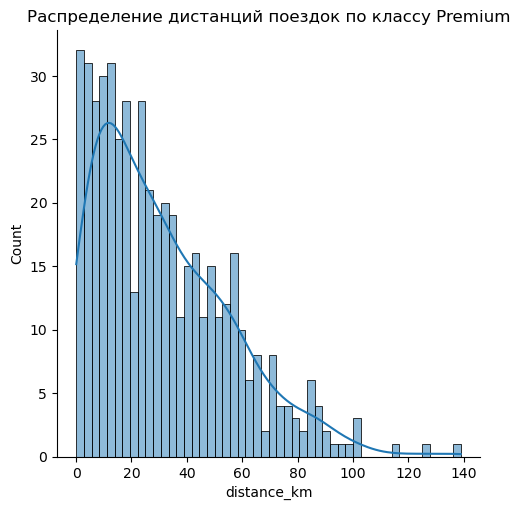

In [60]:
sns.displot(x=taxi_info_premium.distance_km,bins=50,kde=True).set(title='Распределение дистанций поездок по классу Premium')

### Сформируйте выборки по эконом и комфорт-классам. Визуализируйте пересечение интервалов дистанций этих классов (примечание: поможет функция sns.displot)

In [61]:
taxi_info_eccom = pd.concat([taxi_info_comfort,taxi_info_economy], axis=0, ignore_index=True)
taxi_info_eccom

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response,identification
0,2710.0,4.0,19.0,2.142,Comfort,1.0,1.0
1,6635.0,7.0,10.0,10.889,Comfort,1.0,1.0
2,7277.0,4.0,12.0,28.825,Comfort,1.0,1.0
3,7351.0,4.0,2.0,17.281,Comfort,0.0,1.0
4,9088.0,1.0,18.0,4.126,Comfort,0.0,1.0
...,...,...,...,...,...,...,...
995,914935.0,5.0,19.0,13.201,Economy,0.0,2.0
996,915359.0,3.0,16.0,20.151,Economy,0.0,2.0
997,917962.0,1.0,1.0,42.714,Economy,0.0,2.0
998,918737.0,2.0,23.0,14.960,Economy,0.0,2.0


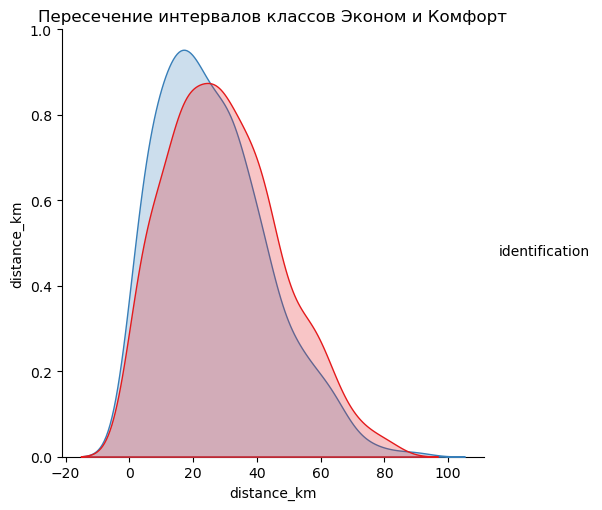

In [85]:
sns.pairplot(taxi_info_eccom[['identification','distance_km']],hue='identification', palette='Set1',height=5).set(title='Пересечение интервалов классов Эконом и Комфорт')

#### Одинаковое количество заказов такси эконом и комфорт класса распределено в интервале от 26 до 28 километров

### Проведите стат. тест (поможет: функция scipy.stats.ttest_ind), проверьте гипоетезу, что дистанции поездок в комфорт-классе отличаются от дистанций поездок эконом-класса (примечание: H0 – выборки не отличаются, H1 – выборки отличны; уровень значимости = 5%)

In [86]:
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(taxi_info_comfort,taxi_info_economy, test_size=0.2)
print(X_train)
print(y_train)

     order_gk  weekday_key  hour_key  distance_km offer_class_group  \
46    68734.0          5.0      16.0        0.609           Comfort   
137  250791.0          5.0      16.0       29.830           Comfort   
238  448036.0          6.0       4.0       25.387           Comfort   
270  503570.0          4.0      23.0       28.084           Comfort   
4      9088.0          1.0      18.0        4.126           Comfort   
..        ...          ...       ...          ...               ...   
290  551137.0          6.0      17.0       20.061           Comfort   
369  683124.0          3.0      11.0       25.523           Comfort   
271  508715.0          4.0      21.0       12.522           Comfort   
307  583364.0          6.0       7.0        9.530           Comfort   
481  896806.0          6.0      20.0       25.823           Comfort   

     driver_response  identification  
46               1.0             1.0  
137              0.0             1.0  
238              1.0          

In [240]:
ttest_ind(X_train['distance_km'], y_train['distance_km'])

Ttest_indResult(statistic=2.920871027493813, pvalue=0.003588957297011715)

#### По двум случайным выборкам мы получаем значение p-value 0.003, что меньше допустимого уровня значимости

In [241]:
ttest_ind(taxi_info_comfort['distance_km'], taxi_info_economy['distance_km'])

Ttest_indResult(statistic=3.1706426042389753, pvalue=0.0015673809987275806)

### Сделайте выводы по результатам проведения стат. теста

#### В результате теста мы получаем значение p-value меньше установленного уровня значимости - 5%. Поэтому мы отвергаем нулевую гипотезу. По итогу теста получаем, что дистанции поездок в комфорт-классе отличаются от дистанций поездок эконом-класса

### Вычислите средние выборок исследуемых классов, с учётом полученного результата проверки гипотез определите – какой из классов предпочитают на дальние поездки (эконом или комфорт)

In [242]:
taxi_info_eccom.groupby('offer_class_group').distance_km.mean().to_frame().reset_index()

,offer_class_group,distance_km
0,Comfort,29.758916
1,Economy,26.283098


In [244]:
taxi_info_eccom.groupby('offer_class_group').median()

,order_gk,weekday_key,hour_key,distance_km,driver_response,identification
offer_class_group,,,,,,
Comfort,475479.0,4.0,12.0,28.0785,0.0,1.0
Economy,455884.5,4.0,12.0,23.7980,0.0,2.0


In [247]:
taxi_info_comfort.where(taxi_info_comfort.distance_km >= 28).dropna().offer_class_group.count()

252

In [248]:
taxi_info_economy.where(taxi_info_economy.distance_km >= 28).dropna().offer_class_group.count()

215

Количество поездок класса Комфорт с дистанцией выше или равной 28 км  - медианное значение, - больше чем количество поездок класса Эконом с этим же диапазоном дистанций. в следствии чего можно утверждать, что такси класса Комфорт пользуется большим спросом при длительных поездках.